# Importing neccessary libraries and dataset

In [1]:
!pip install contractions
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 9.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=a2aa4459ebbb17d8d79dee5a446cedcfab0454bc6c2bee41bd6f5fa33a73d81d
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [2]:
import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
from contractions import contractions_dict # to solve contractions
from autocorrect import Speller #correcting the spellings

#Libraries for general purpose
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing
from sklearn import preprocessing

In [3]:
import numpy as np
import pandas as pd

url="https://raw.githubusercontent.com/AvantikaJalote/Final-Year-Project/main/cyberbullying_tweets.csv"
df=pd.read_csv(url)
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

**There is not much imbalance between different cyberbulling type. other_cyberbulling will be removed since it may cause a confusion for the models with other cyberbullying class.**

In [4]:
df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion             7998
age                  7992
gender               7973
ethnicity            7961
not_cyberbullying    7945
Name: count, dtype: int64

# Dataset Preprocessing

In [5]:
# Renaming Categories
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})

In [6]:
# Checking 10 samples
df.sample(10)

,text,sentiment
17633,"That is the problem, Christianity is not radic...",religion
14960,prison rape jokes also reinforce stereotypes t...,gender
33300,They only do nasty. Any middle school bully co...,age
23002,Stop bringing your anti american Muslim ideas ...,religion
32460,I don't care if the chance of children dying i...,age
7830,STOP bullying! I'm here for you &lt;3,not_cyberbullying
21735,Yes Osama Bin Laden was also struggling for tr...,religion
5964,caio castro fazendo bullying com a(o) pereirão...,not_cyberbullying
16236,By submitting yourself to god it means that yo...,religion
35341,One thing I really need to overcome is the fea...,age


**Converting categories into numbers**

In [7]:
df["sentiment"].replace({"religion": 1, "age": 2, "gender": 3, "ethnicity": 4, "not_cyberbullying": 5}, inplace=True)

/tmp/ipykernel_34/72110131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sentiment"].replace({"religion": 1, "age": 2, "gender": 3, "ethnicity": 4, "not_cyberbullying": 5}, inplace=True)
/tmp/ipykernel_34/72110131.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sentiment"].replace(

In [8]:
sentiments = ["religion","age","gender","ethnicity","not bullying"]

**Preprocessing: Tokenize sentences, Change to lower case, Correct spelling, Remove numbers, Remove punctuation, Remove stopwords, Normalize (Lemmatize or Lemmatization)**

In [9]:
pip install --upgrade emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 7.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0
Note: you may need to restart the kernel to use updated packages.


**Predefined functions for text cleaning**

In [10]:
#Text cleaning
import re, string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Clean emojis from text
#def strip_emoji(text):
    #return re.sub(emoji.get_emoji_regexp(), r"", text) #remove emoji
def strip_emoji(text):
    return emoji.replace_emoji(text, "")

#Remove punctuations, links, stopwords, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14) # remove words longer than 14 characters
    return text

#remove contractions
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the "#" symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

#Stemming
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

#Lemmatization 
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

#Then we apply all the defined functions in the following order
def preprocess(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text

In [11]:
texts_cleaned = []
for t in df.text:
    texts_cleaned.append(preprocess(t))

In [12]:
df['text_clean'] = texts_cleaned

**Clean text**

In [13]:
df.head()

,text,sentiment,text_clean
0,"In other words #katandandre, your food was cra...",5,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,5,aussietv white mkr theblock today sunris studi...
2,@XochitlSuckkks a classy whore? Or more red ve...,5,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",5,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,5,isi account pretend kurdish account like islam...


**Checking tweet duplicates**

In [14]:
df["text_clean"].duplicated().sum()

1049

**There are around 1000 duplicates. We will remove them at the next cell.**

In [15]:
df.drop_duplicates("text_clean", inplace=True)

In [16]:
df.sentiment.value_counts()

sentiment
1    7946
2    7884
4    7746
5    7637
3    7607
Name: count, dtype: int64

**After removing duplicates, the value counts per sentiment is shown above. </br>
There is only a few difference (350) on the sentiment with most text and the sentiment with least text so there is no major imbalance on the data.**

# Checking tweet length

In [17]:
text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [18]:
df['text_len'] = text_len

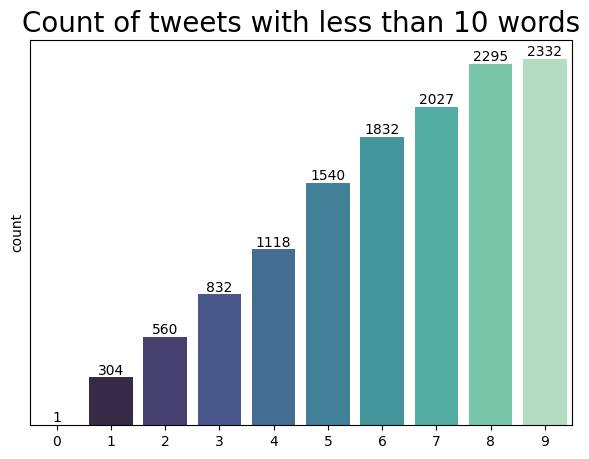

In [19]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [20]:
# checking long tweets
df.sort_values(by=['text_len'], ascending=False)

,text,sentiment,text_clean,text_len
44035,You so black and white trying to live like a n...,4,black white tri live like nigger pahahahaha co...,187
45165,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",4,fuck obama dumb ass nigger bitch ltthi whore s...,162
33724,"... I don't feel guilty for killing him, I jus...",2,feel guilti kill feel guilti enjoy torment sin...,137
1317,@EurekAlertAAAS: Researchers push to import to...,5,research push import top antibulli program us ...,137
47037,@Purely_Ambition: Sooo mad. RT @TracePeterson ...,4,sooo mad rt fuck obama dumb nigger go switzerl...,125
...,...,...,...,...
31,@KamilaaRudenko how are u ?,5,u,1
2812,@reflexhouse what you gona do then? After all ...,5,gona,1
2842,@DerrickLofton73 I am better,5,better,1
10365,@Fullerarty Ahem... http://t.co/Xdi7cMJHBo,3,ahem,1


**Removing tweets with less than 4 words and more than 100 words as they can be outliers**

In [21]:
df = df[df['text_len'] > 3]
df = df[df['text_len'] < 100]

In [22]:
df

,text,sentiment,text_clean,text_len
0,"In other words #katandandre, your food was cra...",5,word katandandr food crapilici mkr,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,5,aussietv white mkr theblock today sunris studi...,10
2,@XochitlSuckkks a classy whore? Or more red ve...,5,classi whore red velvet cupcak,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",5,meh p thank head concern anoth angri dude twitter,9
4,@RudhoeEnglish This is an ISIS account pretend...,5,isi account pretend kurdish account like islam...,8
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",4,black ppl expect anyth depend anyth yet free p...,21
47688,Turner did not withhold his disappointment. Tu...,4,turner withhold turner call court abomin concl...,28
47689,I swear to God. This dumb nigger bitch. I have...,4,swear god dumb nigger bitch got bleach hair re...,13
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,4,yea fuck rt your nigger fuck unfollow fuck dum...,10


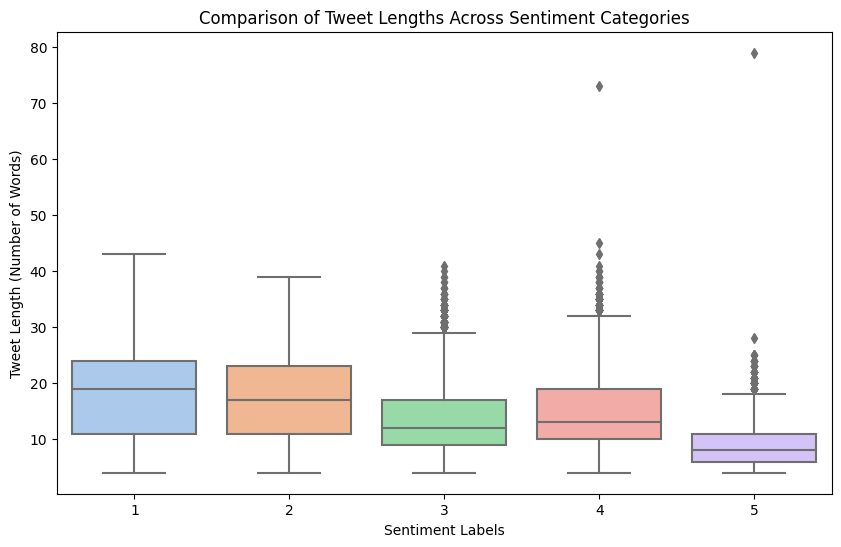

In [23]:
# Box plot for comparing tweet lengths across different sentiment categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y=df['text_clean'].apply(lambda x: len(x.split())), data=df, palette='pastel')
plt.title('Comparison of Tweet Lengths Across Sentiment Categories')
plt.xlabel('Sentiment Labels')
plt.ylabel('Tweet Length (Number of Words)')
plt.show()

# Creating a word cloud

Overall Sentiment Word Cloud:


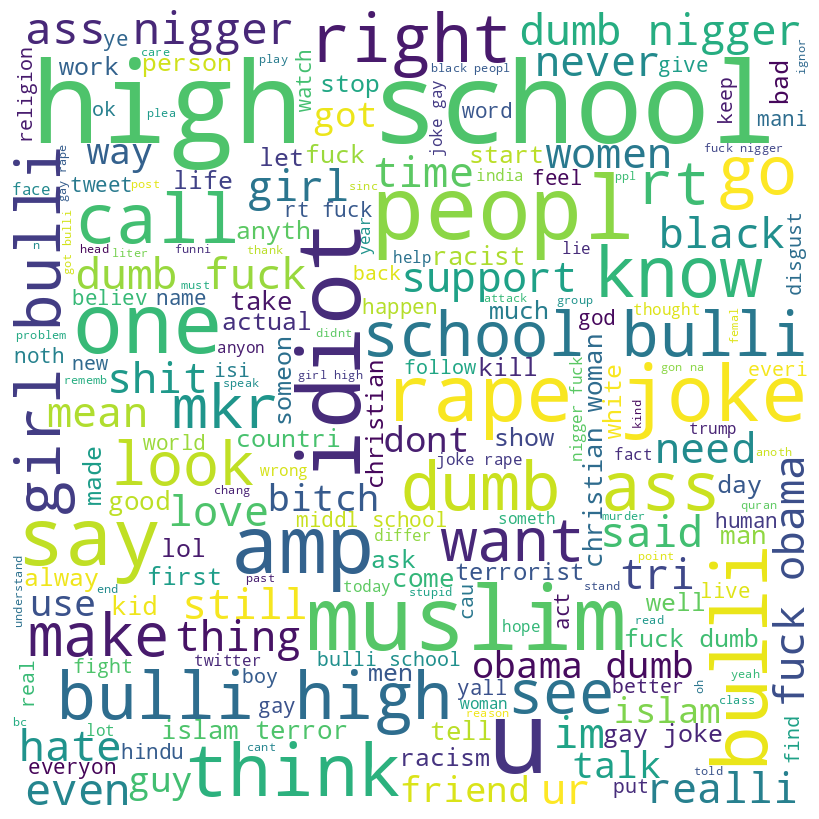


Word Cloud for Religion Cyberbullying:


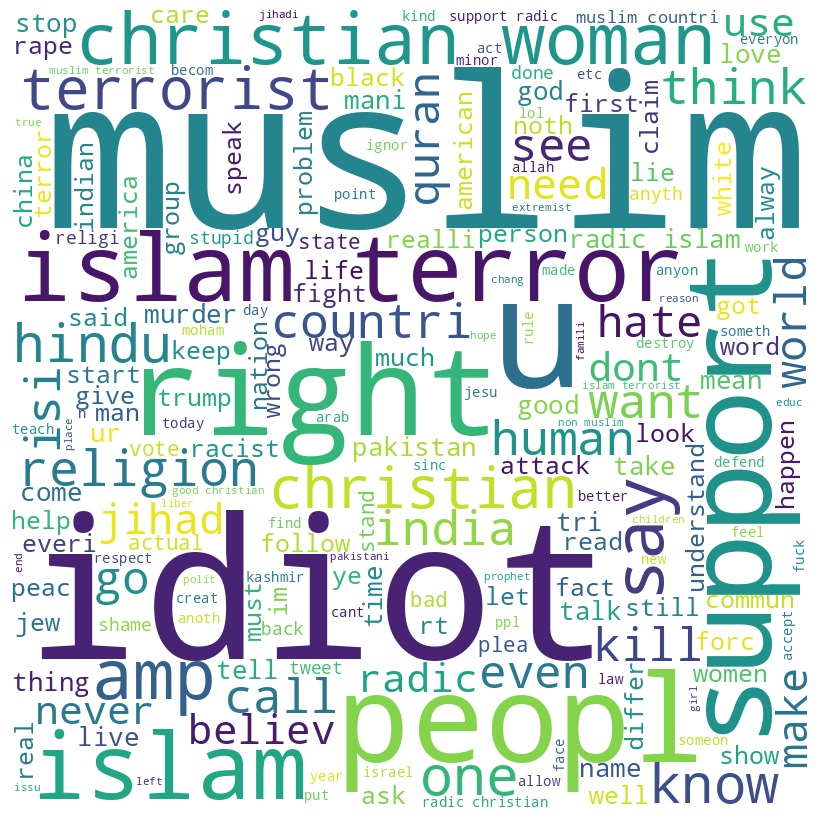


Word Cloud for Age Cyberbullying:


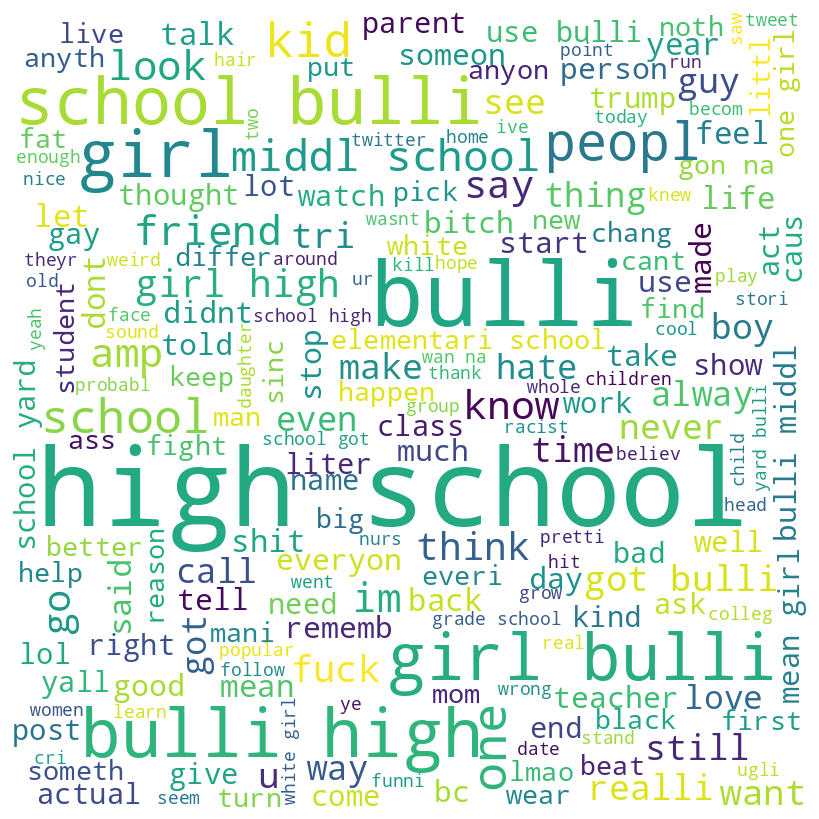


Word Cloud for Gender Cyberbullying:


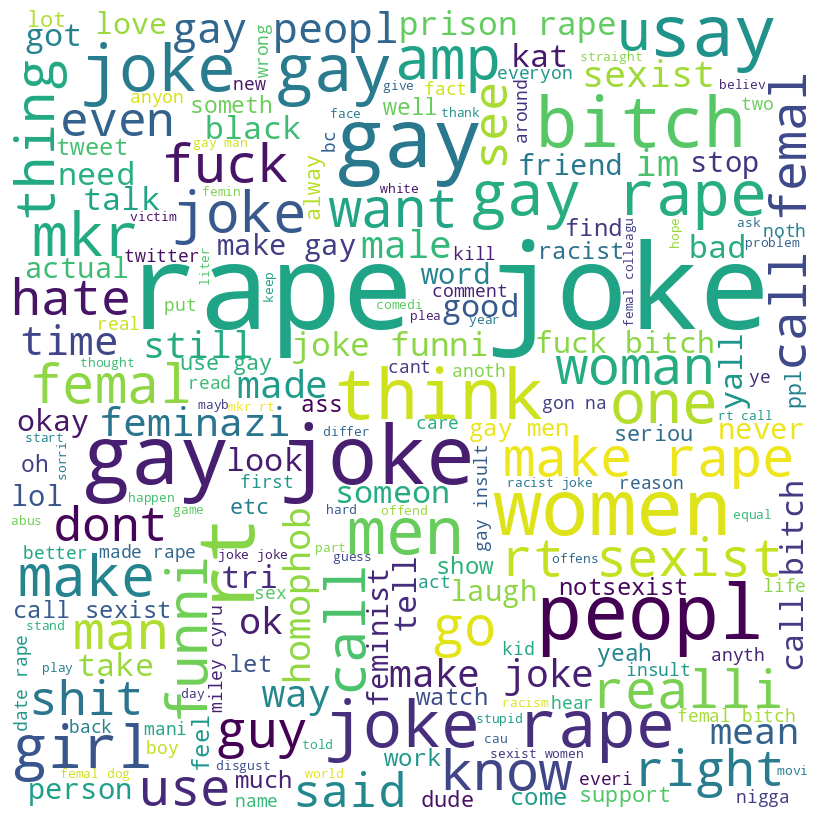


Word Cloud for Ethnicity Cyberbullying:


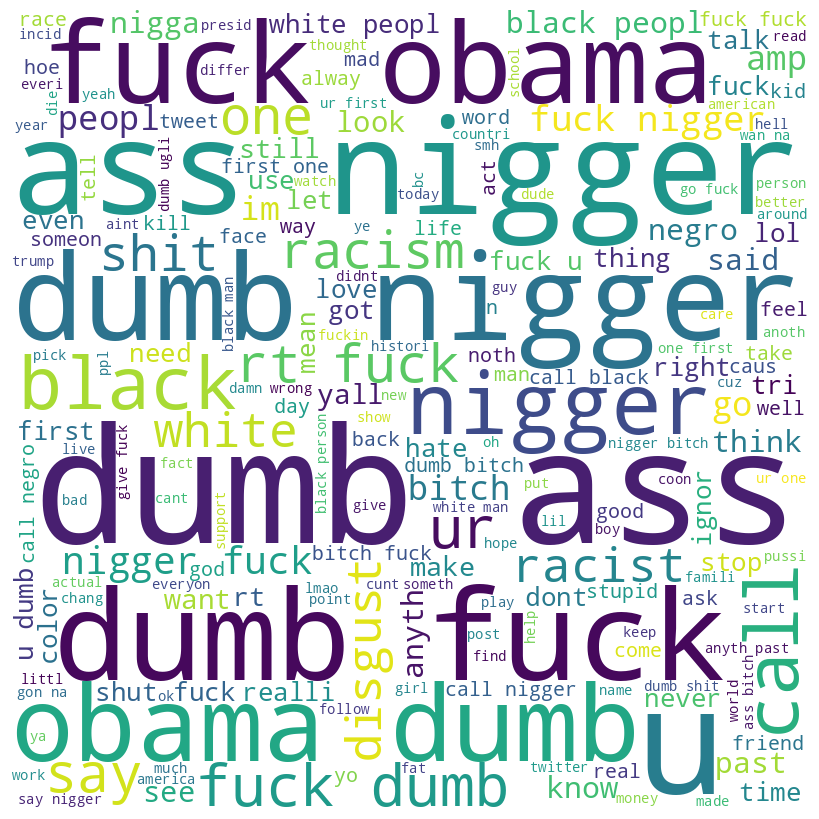


Word Cloud for Not Cyberbullying Cyberbullying:


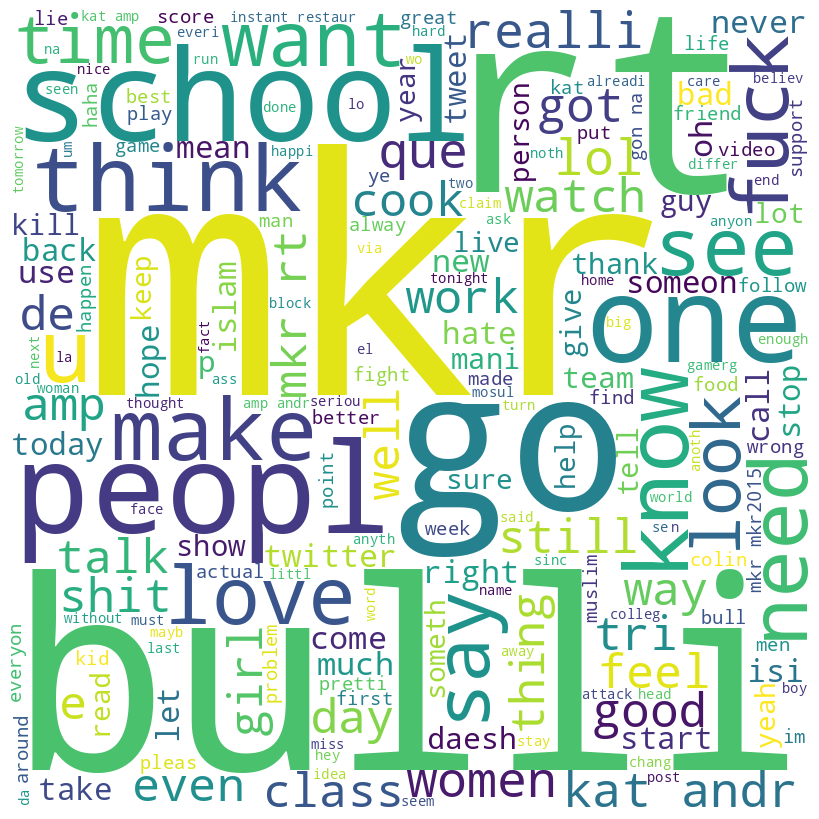

In [24]:
from wordcloud import WordCloud, STOPWORDS

# Function to generate word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(text)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

# Overall sentiment word cloud
overall_text = " ".join(text for text in df.text_clean)
print("Overall Sentiment Word Cloud:")
generate_wordcloud(overall_text)

# Individual sentiment word clouds
sentiments = {
    1: "Religion",
    2: "Age",
    3: "Gender",
    4: "Ethnicity",
    5: "Not Cyberbullying"
}

for sentiment_code, sentiment_name in sentiments.items():
    sentiment_text = " ".join(text for text in df[df['sentiment'] == sentiment_code].text_clean)
    print(f"\nWord Cloud for {sentiment_name} Cyberbullying:")
    generate_wordcloud(sentiment_text)

### Balancing the data using Random Over Sampler

In [25]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Split data into features (X) and labels (y)
X = df['text_clean']
y = df['sentiment']

# Initialize RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)

# Convert the resampled data back to DataFrame format
df_resampled = pd.DataFrame({'text_clean': X_resampled.ravel(), 'sentiment': y_resampled})

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled['text_clean'], df_resampled['sentiment'], test_size=0.2, random_state=42)


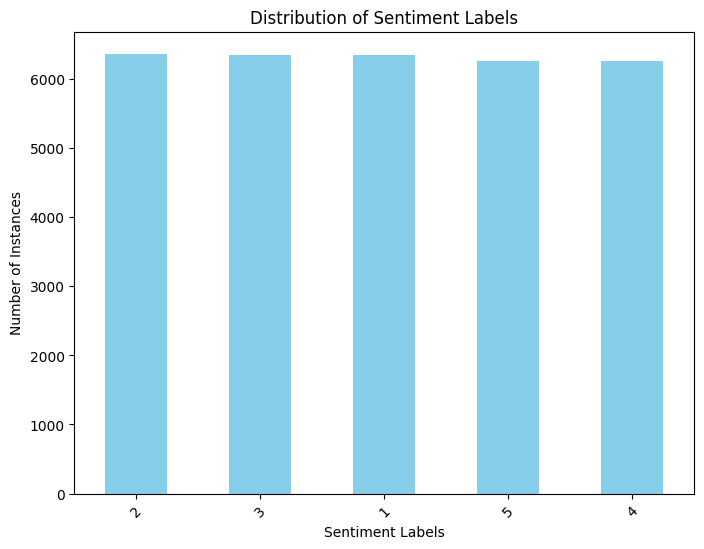

In [26]:
#1: "Religion", 2: "Age",3: "Gender",4: "Ethnicity",5: "Not Cyberbullying"

# Count the occurrences of each sentiment label
sentiment_counts = y_train.value_counts()

# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Labels')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

In [27]:
y_train.value_counts()

sentiment
2    6365
3    6349
1    6338
5    6262
4    6258
Name: count, dtype: int64

**Now the training set is balanced and ready to be feed into the ml model.**

# Model Training and Evaluation

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Define feature extraction techniques
vectorizers = {
    'TF-IDF': TfidfVectorizer(),
    'Count': CountVectorizer(),
    'BoW with n-grams': CountVectorizer(ngram_range=(1, 2))
}

# Define machine learning models
models = {
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier()
}

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text_clean'], df['sentiment'], test_size=0.2, random_state=42)

# Initialize empty dictionaries to store training data, true labels, and predicted labels for each model and vectorizer combination
training_data = {}

# Iterate over all combinations
for vectorizer_name, vectorizer in vectorizers.items():
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    for model_name, model in models.items():
        print(f"Training {model_name} using {vectorizer_name}...")
        model.fit(X_train_vec, y_train)
        
        # Predict probabilities if the model supports it
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test_vec)[:, 1]  # Select probabilities for the positive class
            y_pred = model.predict(X_test_vec)  # Predict class labels
        else:
            y_pred_proba = None
            y_pred = model.predict(X_test_vec)  # Predict class labels
            
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average=None)
        recall = recall_score(y_test, y_pred, average=None)
        f1 = f1_score(y_test, y_pred, average=None)
        
        print(f"\n{model_name} Accuracy ({vectorizer_name}): {accuracy}")
        print(f"{model_name} Classification Report ({vectorizer_name}):")
        print(classification_rep)
        print(f"{model_name} Precision ({vectorizer_name}): {precision}")
        print(f"{model_name} Recall ({vectorizer_name}): {recall}")
        print(f"{model_name} F1-score ({vectorizer_name}): {f1}")
        print("="*50)
        
        # Store the training data, true labels, predicted labels, and predicted probabilities for the current model and vectorizer combination
        training_data[(model_name, vectorizer_name)] = {
            'X_train': X_train_vec,
            'y_train': y_train,
            'y_test': y_test,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }

Training SVM using TF-IDF...

SVM Accuracy (TF-IDF): 0.9322376397682878
SVM Classification Report (TF-IDF):
              precision    recall  f1-score   support

           1       0.96      0.95      0.95      1486
           2       0.96      0.98      0.97      1626
           3       0.95      0.87      0.91      1432
           4       0.98      0.98      0.98      1568
           5       0.81      0.86      0.83      1311

    accuracy                           0.93      7423
   macro avg       0.93      0.93      0.93      7423
weighted avg       0.93      0.93      0.93      7423

SVM Precision (TF-IDF): [0.95708447 0.95576808 0.9468489  0.98401535 0.80656674]
SVM Recall (TF-IDF): [0.94549125 0.98339483 0.87081006 0.9815051  0.86193745]
SVM F1-score (TF-IDF): [0.95125254 0.96938466 0.907239   0.98275862 0.83333333]
Training Naive Bayes using TF-IDF...

Naive Bayes Accuracy (TF-IDF): 0.8322780546948673
Naive Bayes Classification Report (TF-IDF):
              precision    recal

### Random forest with TF-IDF

In [33]:
import joblib

In [35]:
# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Initialize Random Forest model
random_forest = RandomForestClassifier()

# Train the Random Forest model
random_forest.fit(X_train_tfidf, y_train)

# Save the trained model using joblib
joblib.dump(random_forest, 'random_forest_model.joblib')


['random_forest_model.joblib']

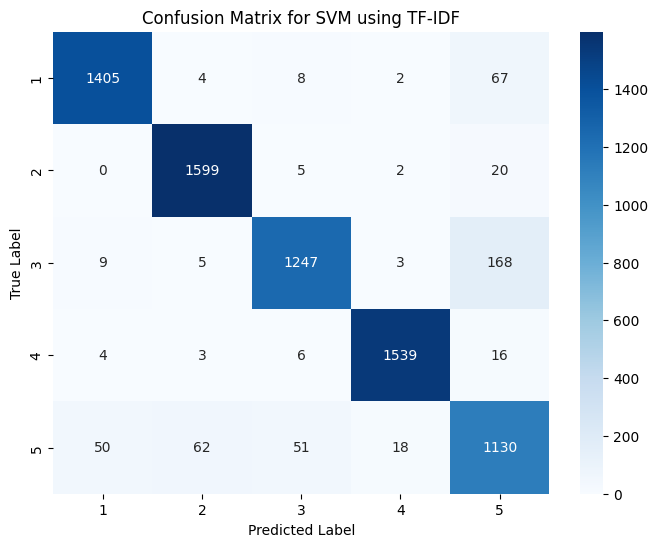

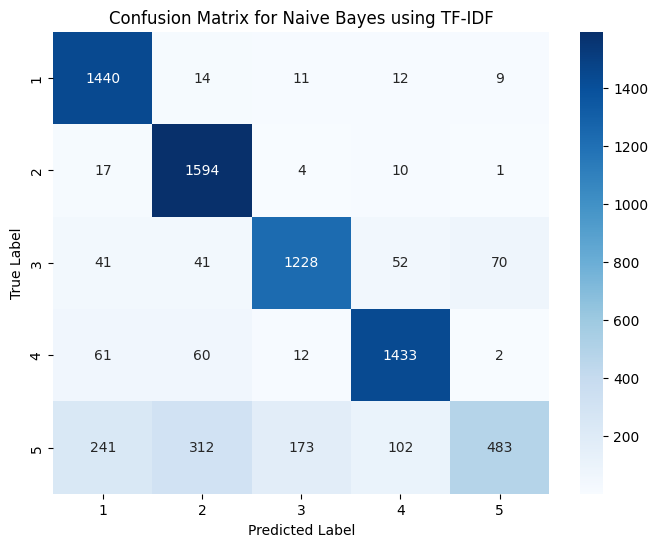

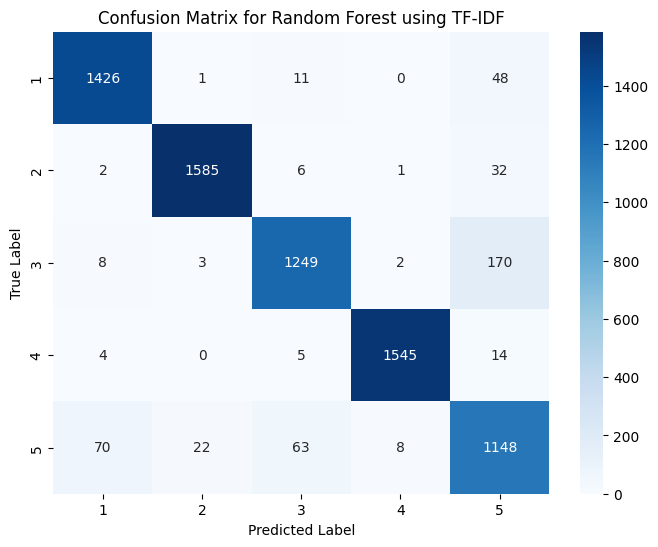

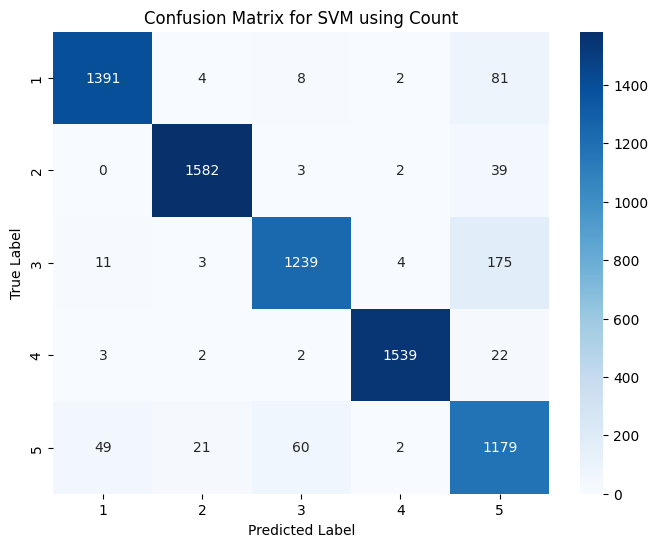

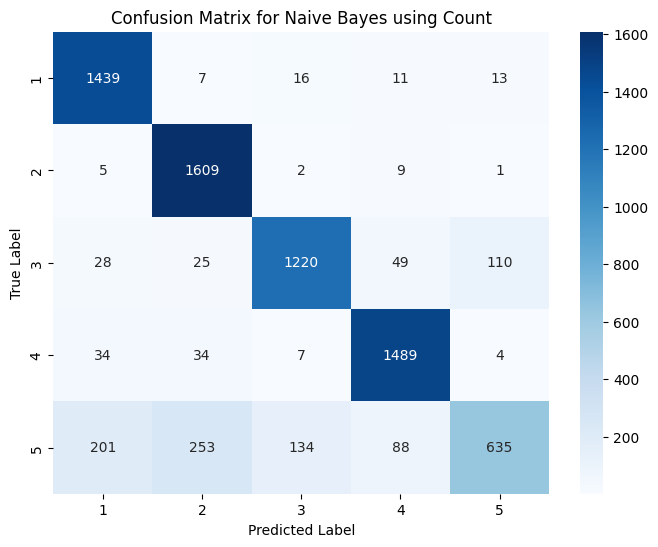

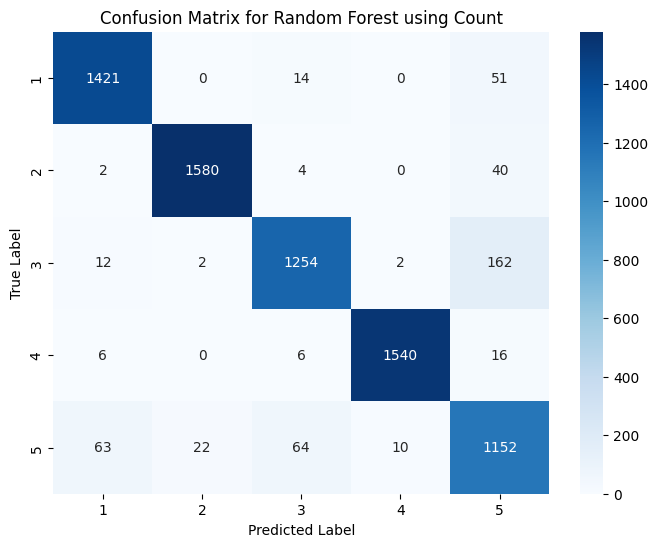

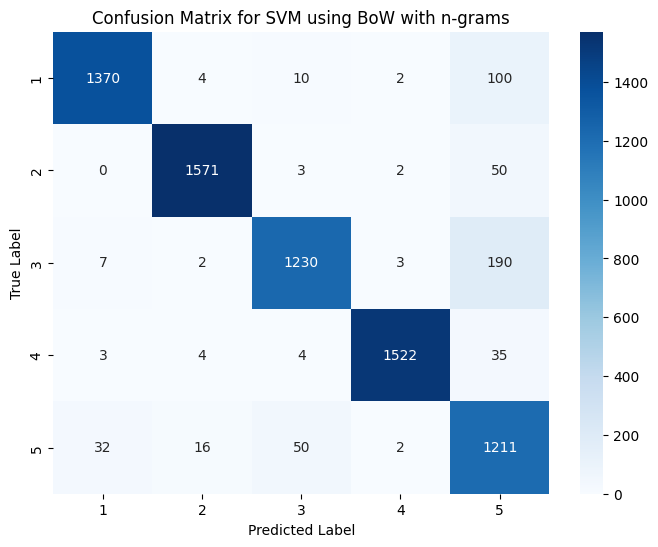

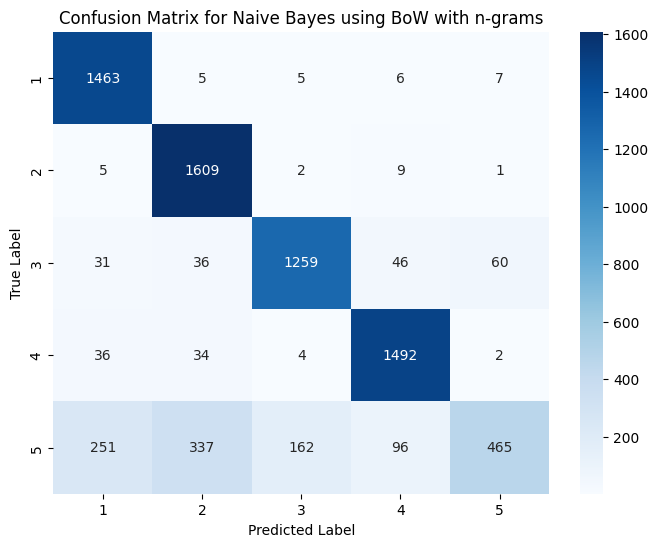

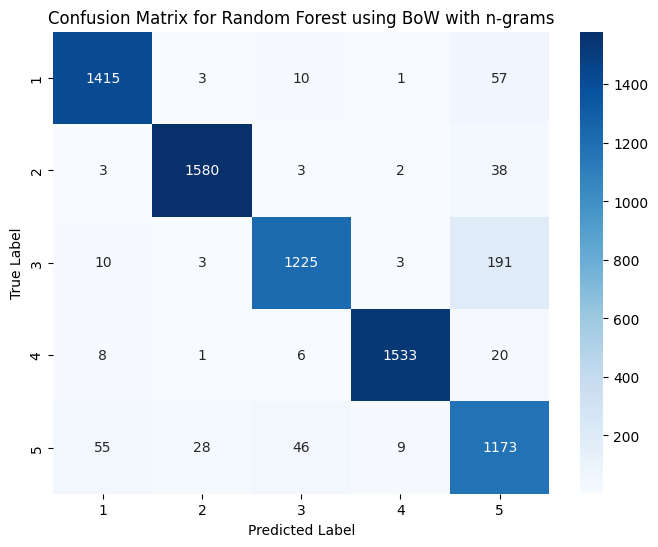

In [29]:
#confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, model_name, vectorizer_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {model_name} using {vectorizer_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Iterate over all model and vectorizer combinations in the training_data dictionary
for (model_name, vectorizer_name), data in training_data.items():
    # Get true labels and predicted labels
    y_test = data['y_test']
    y_pred = data['y_pred']
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, classes=np.unique(y_test), model_name=model_name, vectorizer_name=vectorizer_name)


#### ROC curve cannot be computed because the format of the true labels (y_test) is not supported. The roc_curve function in scikit-learn is designed for binary classification tasks, and it does not support multiclass classification directly.

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Initialize empty dictionary to store cross-validation scores
cross_val_scores = {}

# Define the number of folds for cross-validation
num_folds = 5

# Iterate over all model and vectorizer combinations in the training_data dictionary
for (model_name, vectorizer_name), (X_train_vec, y_train) in training_data.items():
    # Initialize StratifiedKFold for cross-validation
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Perform cross-validation
    scores = cross_val_score(models[model_name], X_train_vec, y_train, cv=kf, scoring='accuracy')
    
    # Store the cross-validation scores
    cross_val_scores[(model_name, vectorizer_name)] = scores
    
    # Print the average cross-validation score
    print(f"Average Cross-Validation Accuracy for {model_name} using {vectorizer_name}: {scores.mean()}")

ValueError: too many values to unpack (expected 2)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Initialize empty dictionary to store cross-validation scores
cross_val_scores = {}

# Define the number of folds for cross-validation
num_folds = 5

# Iterate over all model and vectorizer combinations in the training_data dictionary
for (model_name, vectorizer_name), data in training_data.items():
    X_train_vec = data['X_train']
    y_train = data['y_train']
    
    # Initialize StratifiedKFold for cross-validation
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Perform cross-validation
    scores = cross_val_score(models[model_name], X_train_vec, y_train, cv=kf, scoring='accuracy')
    
    # Store the cross-validation scores
    cross_val_scores[(model_name, vectorizer_name)] = scores
    
    # Print the average cross-validation score
    print(f"Average Cross-Validation Accuracy for {model_name} using {vectorizer_name}: {scores.mean()}")


Average Cross-Validation Accuracy for SVM using TF-IDF: 0.926947441573818
Average Cross-Validation Accuracy for Naive Bayes using TF-IDF: 0.8368190842896948



KeyboardInterrupt



In [28]:
# Function to get parameter grid for each model
def get_param_grid_for_model(model_name):
    if model_name == 'SVM':
        return {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': [0.1, 1, 'auto'],
            'degree': [2, 3, 4]
        }
    elif model_name == 'Naive Bayes':
        return {
            'alpha': [0.1, 0.5, 1.0]
        }
    elif model_name == 'Random Forest':
        return {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    else:
        return {}

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define feature extraction techniques
vectorizers = {
    'TF-IDF': TfidfVectorizer(),
    'Count': CountVectorizer(),
    'BoW with n-grams': CountVectorizer(ngram_range=(1, 2))
}

# Define machine learning models
models = {
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier()
}

# Initialize empty dictionaries to store GridSearchCV results
grid_search_results = {}

# Define scoring metrics for GridSearchCV
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Iterate over all combinations of vectorizers and models
for vectorizer_name, vectorizer in vectorizers.items():
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    for model_name, model in models.items():
        print(f"Performing GridSearchCV for {model_name} using {vectorizer_name}...")
        
        # Define parameter grid for the current model
        param_grid = get_param_grid_for_model(model_name)
        
        # Initialize GridSearchCV with the current model, parameter grid, and scoring
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=5)
        
        # Perform GridSearchCV on training data
        grid_search.fit(X_train_vec, y_train)
        
        # Store the results of GridSearchCV
        grid_search_results[(model_name, vectorizer_name)] = {
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'cv_results': grid_search.cv_results_
        }
        
        print(f"Best Parameters for {model_name} using {vectorizer_name}: {grid_search.best_params_}")
        print(f"Best Score for {model_name} using {vectorizer_name}: {grid_search.best_score_}")
        print("="*50)


Performing GridSearchCV for SVM using TF-IDF...
